## Analysis 2: Restaurent analysis
This is the second level of the Data Science internship project provided by the company Cognifyz.The tasks performed here are listed below.

<b> Task 1: Table booking and online Delivery<b>

- Determine the percentage of restaurants that offer table booking and online delivery.
- 
Compare the average ratings of restaurants with table booking and those withou
- Analyze the availability of online delivery among restaurants with different price ranges.ges.

<b>Task 2: Price Range Analysis<b>

- Determine the most common price range among all the restaurants.
- Calculate the average rating for each price range.
- Identify the color that represents the highest average rating among different price ranges.l variables.

<b> Task:Feature Engineering<b>

- Extract additional features from the existing columns, such as the length of the restaurant name or address.
- Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.
 


In [1]:
#libraries and data loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Dataset.csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
#check for missing values
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
#Cusines have 9 rows of missing values . As 9 is almost negligible compared to 9551 rows
#in the dataset, we can simply remove them.
df = df.dropna()

In [5]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

#### Task 1: Analysis of Table Booking and Online Delivery

In [6]:
#count labels of table booking column
df['Has Table booking'].value_counts()

Has Table booking
No     8384
Yes    1158
Name: count, dtype: int64

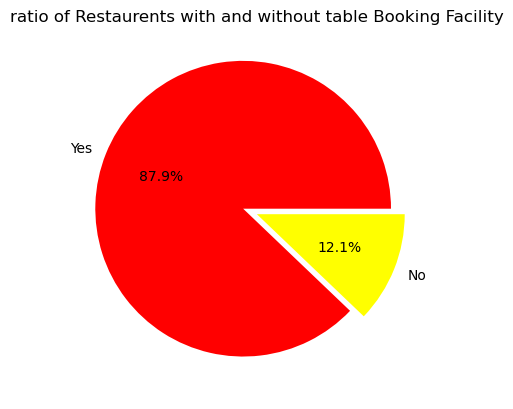

In [7]:
#plot a pie chart for Has Table booking column
labels = ['Yes', 'No']
sizes = df['Has Table booking'].value_counts()
colors = ['red', 'yellow']
explode = [0.1, 0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('ratio of Restaurents with and without table Booking Facility')
plt.show()

In [8]:
online_delv_counts = df['Has Online delivery'].value_counts()
print(online_delv_counts)

Has Online delivery
No     7091
Yes    2451
Name: count, dtype: int64


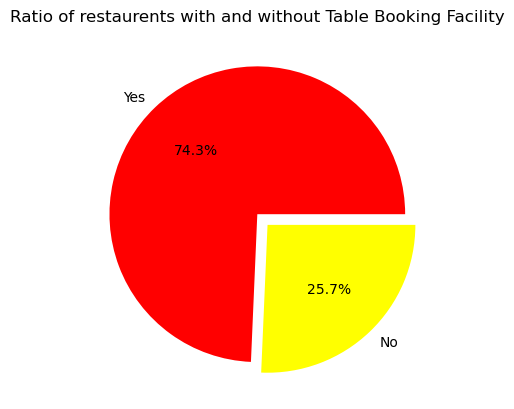

In [9]:
#pie chart to show distribution of restaurents having online delivery or not
plt.pie(online_delv_counts, explode=[0, 0.1], labels=['Yes', 'No'], colors=['red', 'yellow'], autopct='%1.1f%%')
plt.title('Ratio of restaurents with and without Table Booking Facility')
plt.show()

Average rating of restaurants with table booking: 3.44
Average rating of restaurants without table booking: 2.56


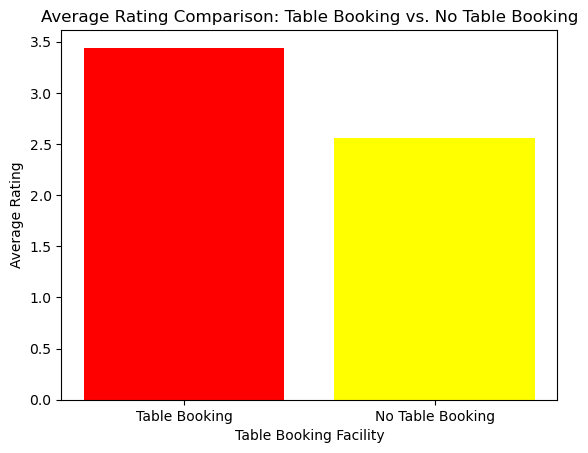

In [10]:
# comparing the average rating of restaurants having table booking and those that don't
df_table_booking_yes = df[df['Has Table booking'] == 'Yes']
df_table_booking_no = df[df['Has Table booking'] == 'No']

average_rating_table_booking_yes = df_table_booking_yes['Aggregate rating'].mean()
average_rating_table_booking_no = df_table_booking_no['Aggregate rating'].mean()

print(f"Average rating of restaurants with table booking: {average_rating_table_booking_yes:.2f}")
print(f"Average rating of restaurants without table booking: {average_rating_table_booking_no:.2f}")

# visualizing the same using bar graph
labels = ['Table Booking', 'No Table Booking']
values = [average_rating_table_booking_yes, average_rating_table_booking_no]

plt.bar(labels, values, color=['red', 'yellow'])
plt.xlabel("Table Booking Facility")
plt.ylabel("Average Rating")
plt.title("Average Rating Comparison: Table Booking vs. No Table Booking")
plt.show()

In [11]:
df['Price range'].value_counts()

Price range
1    4438
2    3113
3    1405
4     586
Name: count, dtype: int64

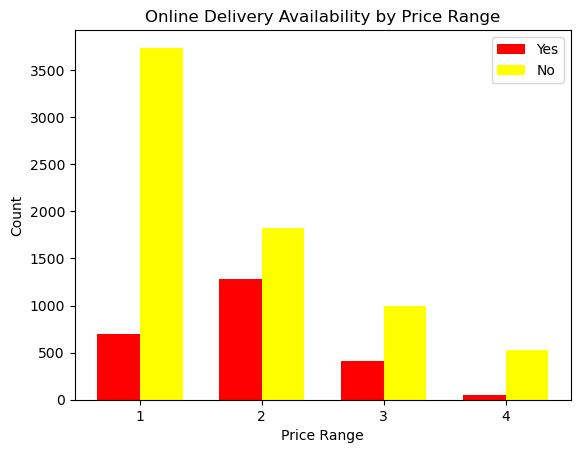

In [12]:
# showing the distribution of online delivery availability in each price range (1 to 4)
price_range_counts = df['Price range'].value_counts()
yes_counts = []
no_counts = []

for i in range(1, 5):
  yes_count = df[(df['Price range'] == i) & (df['Has Online delivery'] == 'Yes')].shape[0]
  no_count = df[(df['Price range'] == i) & (df['Has Online delivery'] == 'No')].shape[0]
  yes_counts.append(yes_count)
  no_counts.append(no_count)

labels = ['1', '2', '3', '4']
width = 0.35

x = np.arange(len(labels))

plt.bar(x - width/2, yes_counts, width, color='red', label='Yes')
plt.bar(x + width/2, no_counts, width, color='yellow', label='No')

plt.xticks(x, labels)
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Online Delivery Availability by Price Range')
plt.legend()
plt.show()

In [13]:
# calculating percentage for restaurants having online delivery (Yes-red) in each price range
total_counts = [yes_counts[i] + no_counts[i] for i in range(len(yes_counts))]
percentages = [(yes_counts[i] / total_counts[i]) * 100 for i in range(len(yes_counts))]

for i, percentage in enumerate(percentages):
  print(f"Price Range {i+1}: {percentage:.2f}%")

Price Range 1: 15.80%
Price Range 2: 41.31%
Price Range 3: 29.25%
Price Range 4: 9.04%


### Task 2: Price Range Analysis

In [14]:
price_range_counts = df['Price range'].value_counts()
print(price_range_counts)

Price range
1    4438
2    3113
3    1405
4     586
Name: count, dtype: int64


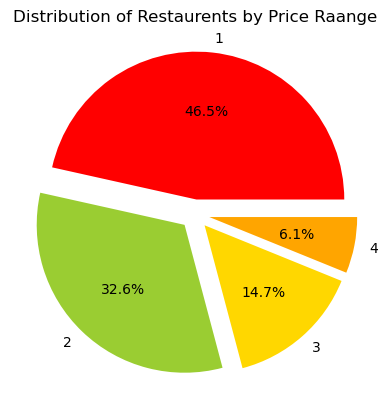

In [15]:
labels = ['1','2','3','4']
sizes = price_range_counts.values
colors = ['red', 'yellowgreen', 'gold', 'orange']
explode = [0.1,0.1,0.1,0.1]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Distribution of Restaurents by Price Raange')
plt.show()


In [16]:
# Calculate the average rating for each price range
average_ratings = []

for i in range(1, 5):
  price_range_df = df[df['Price range'] == i]
  average_rating = price_range_df['Aggregate rating'].mean()
  average_ratings.append(average_rating)

for i, average_rating in enumerate(average_ratings):
  print(f"Average rating for price range {i+1}: {average_rating:.2f}")


Average rating for price range 1: 2.00
Average rating for price range 2: 2.94
Average rating for price range 3: 3.68
Average rating for price range 4: 3.82


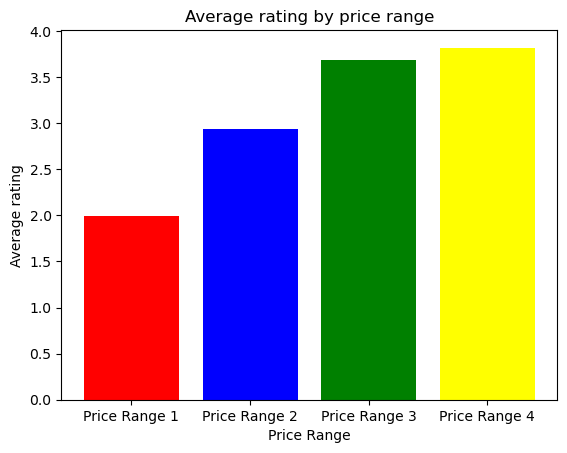

In [17]:
labels = ['Price Range 1', 'Price Range 2', 'Price Range 3', 'Price Range 4']
values = average_ratings
plt.bar(labels, values, color=['red', 'blue', 'green', 'yellow'])
plt.xlabel("Price Range")
plt.ylabel("Average rating")
plt.title("Average rating by price range")
plt.show()

In [18]:
df['Rating color'].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

In [19]:
df['Aggregate rating'].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

In [20]:
rating_color_to_aggregate_rating = {}
for color in df['Rating color'].unique():
    aggregate_ratings = df[df['Rating color'] == color]['Aggregate rating'].unique()
    rating_color_to_aggregate_rating[color] = aggregate_ratings

for key, value in rating_color_to_aggregate_rating.items():
    print(f"{key}:{value}")

Dark Green:[4.8 4.5 4.9 4.7 4.6]
Green:[4.4 4.  4.2 4.3 4.1]
Yellow:[3.6 3.8 3.7 3.9 3.5]
Orange:[3.  3.2 3.1 3.3 3.4 2.9 2.6 2.8 2.7 2.5]
White:[0.]
Red:[2.2 2.4 2.1 1.8 2.  2.3 1.9]


We can observe the pattern of assigning rating color to aggregate ratings.

- We infer from above analysis that Restaurents of the price range "4" have the heighest average rating of 3.82.
- Therefore, "Yellow" is the color assigned to the resturents of heighest average rating.

## Task 3: Feature Engineering

In [21]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [22]:
df1 = df.copy()

In [23]:
#adding a new feature "No of cuisines"
df['No of cuisines'] = df1['Cuisines'].str.split(',').str.len()
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [24]:
df1['Weighted_Rating'] = (df1['Aggregate rating'] * df1['Votes']) / (df1['Votes'] + 10)
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Weighted_Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,4.651852
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,4.425125
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,4.242857
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,4.769333
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,4.599163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,4.048622
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,4.159770
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,3.644858
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,3.956092


In [25]:
df1['Weighted_Rating'] = df1['Weighted_Rating'].apply(lambda x: round(x, 1))
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Weighted_Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,4.7
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,4.4
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,4.2
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,4.8
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,4.6


In [26]:

# inspecting restaurants having highest weighted rating
highest_weighted_ratings = {}
for index, row in df1.iterrows():
  restaurant = row["Restaurant Name"]
  weighted_rating = row["Weighted_Rating"]
  if weighted_rating == df1['Weighted_Rating'].max():
    highest_weighted_ratings[restaurant] = weighted_rating

for key, value in highest_weighted_ratings.items():
    print(f"{key}: {value}")

Silantro Fil-Mex: 4.9
Pom Pom's Teahouse and Sandwicheria: 4.9
Yellow Dog Eats: 4.9
McGuire's Irish Pub & Brewery: 4.9
Mama's Fish House: 4.9
Mazzaro's Italian Market: 4.9
Mr. Dunderbak's Biergarten and Marketplatz: 4.9
Tresind - Nassima Royal Hotel: 4.9
AB's - Absolute Barbecues: 4.9
Barbeque Nation: 4.9
Grandson of Tunday Kababi: 4.9
Mirchi And Mime: 4.9
Naturals Ice Cream: 4.9
Indian Accent - The Manor: 4.9
Talaga Sampireun: 4.9
Starbucks: 4.9


In [27]:
# inspecting restaurants having highest aggregate rating
highest_aggregate_ratings = {}
for index, row in df1.iterrows():
  restaurant = row["Restaurant Name"]
  aggregate_rating = row["Aggregate rating"]
  if aggregate_rating == df1['Aggregate rating'].max():
    highest_aggregate_ratings[restaurant] = aggregate_rating

for key, value in highest_aggregate_ratings.items():
    print(f"{key}: {value}")


Ooma: 4.9
Spiral - Sofitel Philippine Plaza Manila: 4.9
Silantro Fil-Mex: 4.9
Coco Bambu: 4.9
Braseiro da G��vea: 4.9
Garota de Ipanema: 4.9
Rae's Coastal Cafe: 4.9
Shorts Burger and Shine: 4.9
Oakwood Cafe: 4.9
Tantra Asian Bistro: 4.9
The Cafe: 4.9
Atlanta Highway Seafood Market: 4.9
Ingleside Village Pizza: 4.9
Pom Pom's Teahouse and Sandwicheria: 4.9
Yellow Dog Eats: 4.9
McGuire's Irish Pub & Brewery: 4.9
Mama's Fish House: 4.9
Marukame Udon: 4.9
Mazzaro's Italian Market: 4.9
Mr. Dunderbak's Biergarten and Marketplatz: 4.9
Punjab Grill: 4.9
AB's Absolute Barbecues: 4.9
Carnival By Tresind: 4.9
Tresind - Nassima Royal Hotel: 4.9
Sheroes Hangout: 4.9
Sagar Gaire Fast Food: 4.9
AB's - Absolute Barbecues: 4.9
CakeBee: 4.9
The Great Indian Pub: 4.9
Caterspoint: 4.9
Barbeque Nation: 4.9
Zolocrust - Hotel Clarks Amer: 4.9
Grandson of Tunday Kababi: 4.9
Mirchi And Mime: 4.9
Naturals Ice Cream: 4.9
Indian Accent - The Manor: 4.9
Masala Library: 4.9
Talaga Sampireun: 4.9
Sushi Masa: 4.9
Mils

We notice that a number of restaurents having heighest "aggregate rating" now got normalized to slightly lower "weighted rating" due to addition of "votes" parameter to the rating.

In [28]:

#encode the yes-no labels of features like online delivery, table booking etc into binary (1 for yes and 0 for no)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df1['Has Online delivery'] = le.fit_transform(df1['Has Online delivery'])
df1['Has Table booking'] = le.fit_transform(df1['Has Table booking'])
df1['Switch to order menu'] = le.fit_transform(df1['Switch to order menu'])
df1['Is delivering now'] = le.fit_transform(df1['Is delivering now'])

df1.head()
     

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Weighted_Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,1,0,0,0,3,4.8,Dark Green,Excellent,314,4.7
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,1,0,0,0,3,4.5,Dark Green,Excellent,591,4.4
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,1,0,0,0,4,4.4,Green,Very Good,270,4.2
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,0,0,0,0,4,4.9,Dark Green,Excellent,365,4.8
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,1,0,0,0,4,4.8,Dark Green,Excellent,229,4.6


In Task 3, Feature engineering was performed.

- added additional features "no of cuisines","weighted rating" and "restaurant name length".
- encode the yes-no labels to binary (1 for yes, 0 for no) for the features "Has Online delivery","Has Table Booking","Is delivering now" and "Switch to order menu"

## Conclusion of Level 2 :
The main objective of level 2 is the explorative data analysis of the availability of services, average ratings, and common price ranges among restaurants, as well as robust feature engineering to enhance the dataset. I gathered the following insights:

#### Analysis of restaurent Services:

- Restaurants offering table booking and online delivery dominate in majority the restaurants that don't offer those services.
- Restaurants having table booking facility have fairly higher average rating.
- In each price range (1 to 4), restaurants delivering online are lesser in number. But we notice that most of those restaurants having online delivery lie in the price range of 2 and 3.

#### Analysis of Restaurant Ratings:

- There are more number of cheaper restaurants ie lesser price range ie (more than 70%).
-  Expensive restaurants have higher ratings.
-  Yellow is the color that represents the highest average rating among different price ranges.

#### Feature Engineering:

- I added extra features like No of Cuisines, Weighted Rating etc.
- I also performed label encoding of categorical features like Online delivery, Table Booking etc.s.3.